In [5]:
import zipfile
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image
import shutil

# Step 1: Specify the path of the zipped dataset
zip_file_path = 'drive-download-20241201T152444Z-001.zip'  # Update this with the correct zip file path
extract_dir = './dataset'

# Step 2: Extract the zipped dataset
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Verify the dataset structure
print("Extracted files:")
print(os.listdir(extract_dir))

# Ensure directories exist
GOOD_IMAGES_DIR = os.path.join(extract_dir, 'good')
BAD_IMAGES_DIR = os.path.join(extract_dir, 'bad')

if not os.path.exists(GOOD_IMAGES_DIR) or not os.path.exists(BAD_IMAGES_DIR):
    raise FileNotFoundError("Ensure the dataset contains 'good' and 'bad' directories.")
else:
    print("Dataset structure verified. Proceeding to training.")

# Hyperparameters
IMG_SIZE = (128, 128)  # Resize images to 128x128
BATCH_SIZE = 32
EPOCHS = 10

# Data Preparation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 20% of data for validation
)

train_generator = train_datagen.flow_from_directory(
    extract_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training',
    shuffle=True
)

validation_generator = train_datagen.flow_from_directory(
    extract_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation',
    shuffle=True
)

# Model Definition
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Model Training
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=EPOCHS,
    callbacks=[early_stopping]
)

# Evaluation
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

# Save Model
model.save('./scratch_detection_model.h5')

# Testing on a Single Image
def predict_image(img_path):
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    prediction = model.predict(img_array)
    return "Bad Image" if prediction[0] > 0.5 else "Good Image"

# Test Example
test_image_path = os.path.join(BAD_IMAGES_DIR, os.listdir(BAD_IMAGES_DIR)[0])  # Replace with actual test image path if needed
result = predict_image(test_image_path)
print(f"Prediction for test image: {result}")


FileNotFoundError: [Errno 2] No such file or directory: 'drive-download-20241201T152444Z-001.zip'

In [8]:
import zipfile
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image

# Step 1: Specify the path of the zipped dataset
zip_file_path = '/Users/rahul.g/Desktop/drive-download-20241201T152444Z-001.zip'  # Updated path
extract_dir = './dataset'

# Step 2: Extract the zipped dataset
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Verify the dataset structure
print("Extracted files:")
print(os.listdir(extract_dir))

# Ensure directories exist
GOOD_IMAGES_DIR = os.path.join(extract_dir, 'good')
BAD_IMAGES_DIR = os.path.join(extract_dir, 'bad')

if not os.path.exists(GOOD_IMAGES_DIR) or not os.path.exists(BAD_IMAGES_DIR):
    raise FileNotFoundError("Ensure the dataset contains 'good' and 'bad' directories.")
else:
    print("Dataset structure verified. Proceeding to training.")

# Hyperparameters
IMG_SIZE = (128, 128)  # Resize images to 128x128
BATCH_SIZE = 32
EPOCHS = 10

# Data Preparation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 20% of data for validation
)

train_generator = train_datagen.flow_from_directory(
    extract_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training',
    shuffle=True
)

validation_generator = train_datagen.flow_from_directory(
    extract_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation',
    shuffle=True
)

# Model Definition
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Model Training
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=EPOCHS,
    callbacks=[early_stopping]
)

# Evaluation
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

# Save Model
model.save('./scratch_detection_model.h5')

# Testing on a Single Image
def predict_image(img_path):
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    prediction = model.predict(img_array)
    return "Bad Image" if prediction[0] > 0.5 else "Good Image"

# Test Example
test_image_path = os.path.join(BAD_IMAGES_DIR, os.listdir(BAD_IMAGES_DIR)[0])  # Replace with actual test image path if needed
result = predict_image(test_image_path)
print(f"Prediction for test image: {result}")


Extracted files:
['.DS_Store', 'bad', 'good', 'masks']
Dataset structure verified. Proceeding to training.
Found 4980 images belonging to 3 classes.
Found 1243 images belonging to 3 classes.


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


156/156 ━━━━━━━━━━━━━━━━━━━━ 27s 166ms/step - accuracy: 0.6416 - loss: -335931.0938 - val_accuracy: 0.6718 - val_loss: -18837224.0000
Epoch 2/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 25s 161ms/step - accuracy: 0.6680 - loss: -130212672.0000 - val_accuracy: 0.6718 - val_loss: -1350977664.0000
Epoch 3/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 26s 163ms/step - accuracy: 0.6711 - loss: -3155834112.0000 - val_accuracy: 0.6718 - val_loss: -14517043200.0000
Epoch 4/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 26s 165ms/step - accuracy: 0.6680 - loss: -24812224512.0000 - val_accuracy: 0.6718 - val_loss: -69967175680.0000
Epoch 5/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 26s 169ms/step - accuracy: 0.6729 - loss: -101238063104.0000 - val_accuracy: 0.6718 - val_loss: -225680785408.0000
Epoch 6/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 26s 168ms/step - accuracy: 0.6844 - loss: -281167626240.0000 - val_accuracy: 0.6718 - val_loss: -571130904576.0000
Epoch 7/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 27s 171ms/step - accuracy: 0.6753 - loss: -712418066432.0000 

Validation Loss: -6345095905280.0
Validation Accuracy: 0.6717618703842163
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Prediction for test image: Bad Image


Extracted files:
['.DS_Store', 'bad', 'good', 'masks']
Dataset structure verified. Proceeding to training.
Found 4980 images belonging to 3 classes.
Found 1243 images belonging to 3 classes.


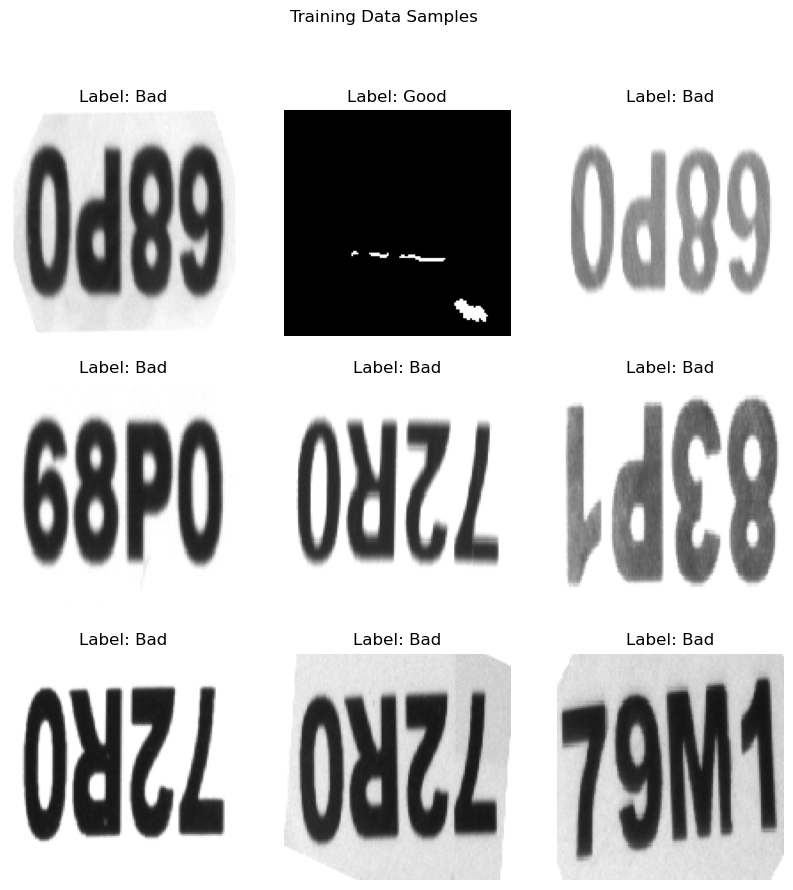

Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


156/156 ━━━━━━━━━━━━━━━━━━━━ 27s 166ms/step - accuracy: 0.6595 - loss: -599186.8750 - val_accuracy: 0.6718 - val_loss: -31769300.0000
Epoch 2/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 26s 165ms/step - accuracy: 0.6871 - loss: -239472080.0000 - val_accuracy: 0.6718 - val_loss: -2501949696.0000
Epoch 3/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 26s 166ms/step - accuracy: 0.6676 - loss: -5648669696.0000 - val_accuracy: 0.6718 - val_loss: -25372846080.0000
Epoch 4/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 27s 172ms/step - accuracy: 0.6642 - loss: -42825277440.0000 - val_accuracy: 0.6718 - val_loss: -118063816704.0000
Epoch 5/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 27s 171ms/step - accuracy: 0.6712 - loss: -164089282560.0000 - val_accuracy: 0.6718 - val_loss: -376227233792.0000
Epoch 6/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 27s 170ms/step - accuracy: 0.6631 - loss: -509435805696.0000 - val_accuracy: 0.6718 - val_loss: -943797436416.0000
Epoch 7/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 27s 174ms/step - accuracy: 0.6718 - loss: -1192604860416.000

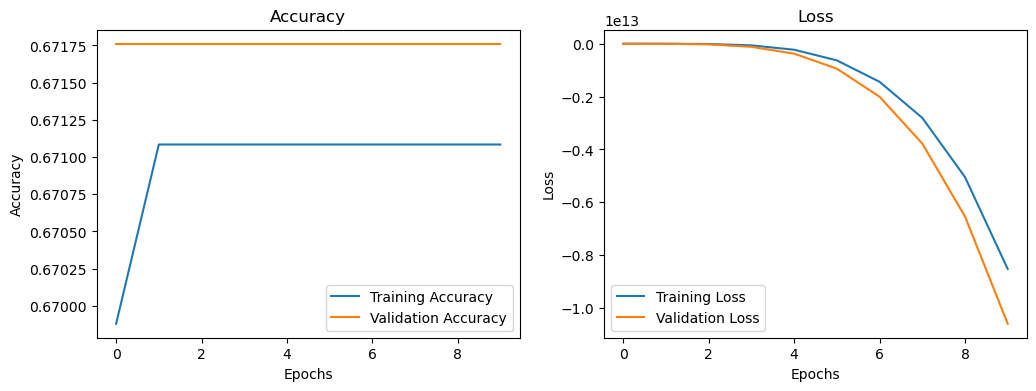

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Prediction for test image: Bad Image


In [10]:
import zipfile
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Step 1: Specify the path of the zipped dataset
zip_file_path = '/Users/rahul.g/Desktop/drive-download-20241201T152444Z-001.zip'  # Updated path
extract_dir = './dataset'

# Step 2: Extract the zipped dataset
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Verify the dataset structure
print("Extracted files:")
print(os.listdir(extract_dir))

# Ensure directories exist
GOOD_IMAGES_DIR = os.path.join(extract_dir, 'good')
BAD_IMAGES_DIR = os.path.join(extract_dir, 'bad')

if not os.path.exists(GOOD_IMAGES_DIR) or not os.path.exists(BAD_IMAGES_DIR):
    raise FileNotFoundError("Ensure the dataset contains 'good' and 'bad' directories.")
else:
    print("Dataset structure verified. Proceeding to training.")

# Hyperparameters
IMG_SIZE = (128, 128)  # Resize images to 128x128
BATCH_SIZE = 32
EPOCHS = 10

# Data Preparation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 20% of data for validation
)

train_generator = train_datagen.flow_from_directory(
    extract_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training',
    shuffle=True
)

validation_generator = train_datagen.flow_from_directory(
    extract_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation',
    shuffle=True
)

# Visualize some sample images
def plot_samples(generator, title):
    images, labels = next(generator)
    plt.figure(figsize=(10, 10))
    for i in range(9):  # Display 9 images
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(f"Label: {'Bad' if labels[i] == 1 else 'Good'}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

plot_samples(train_generator, "Training Data Samples")

# Model Definition
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Model Training
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=EPOCHS,
    callbacks=[early_stopping]
)

# Visualize Training and Validation Accuracy/Loss
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_training_history(history)

# Save Model
model.save('./scratch_detection_model.h5')

# Testing on a Single Image
def predict_image(img_path):
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    prediction = model.predict(img_array)
    return "Bad Image" if prediction[0] > 0.5 else "Good Image"

# Test Example
test_image_path = os.path.join(BAD_IMAGES_DIR, os.listdir(BAD_IMAGES_DIR)[0])  # Replace with actual test image path if needed
result = predict_image(test_image_path)
print(f"Prediction for test image: {result}")


Extracted files:
['.DS_Store', 'bad', 'good', 'masks']
Dataset structure verified. Proceeding to training.
Found 4980 images belonging to 3 classes.
Found 1243 images belonging to 3 classes.


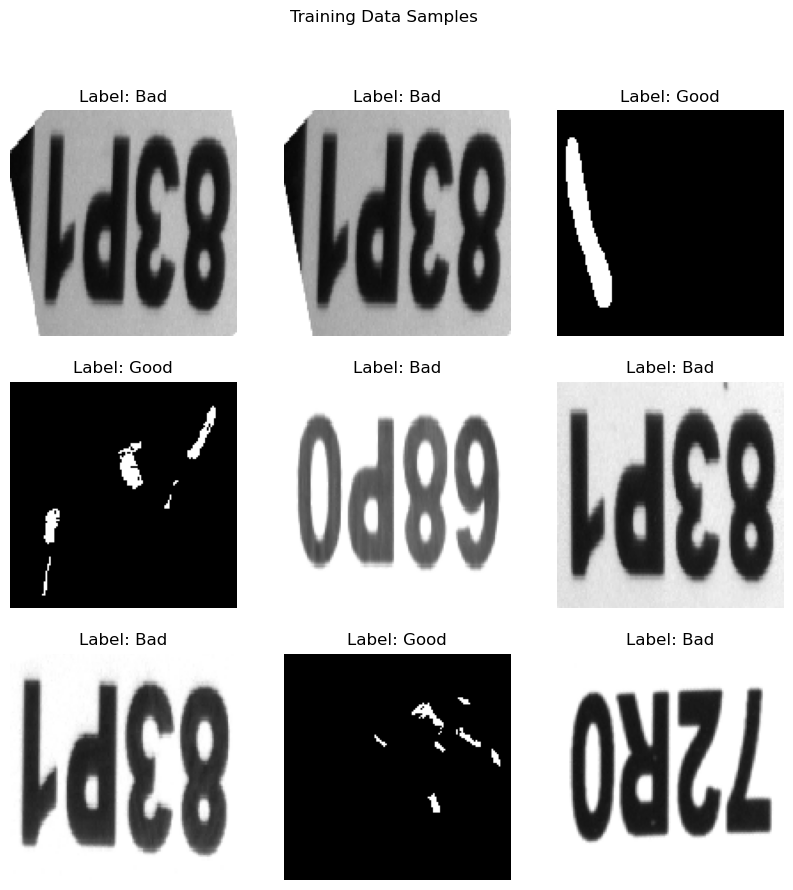

Epoch 1/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 34s 210ms/step - accuracy: 0.6582 - loss: -523596.4688 - val_accuracy: 0.6718 - val_loss: -28680670.0000
Epoch 2/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 27s 173ms/step - accuracy: 0.6771 - loss: -202424304.0000 - val_accuracy: 0.6718 - val_loss: -2190365696.0000
Epoch 3/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 26s 166ms/step - accuracy: 0.6670 - loss: -5155842560.0000 - val_accuracy: 0.6718 - val_loss: -23063779328.0000
Epoch 4/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 28s 181ms/step - accuracy: 0.6747 - loss: -37544624128.0000 - val_accuracy: 0.6718 - val_loss: -106256351232.0000
Epoch 5/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 27s 172ms/step - accuracy: 0.6788 - loss: -148160790528.0000 - val_accuracy: 0.6718 - val_loss: -327959248896.0000
Epoch 6/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 27s 171ms/step - accuracy: 0.6631 - loss: -443272003584.0000 - val_accuracy: 0.6718 - val_loss: -828419997696.0000
Epoch 7/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 27s 171ms/step - accuracy: 0.6673 - loss: -106359

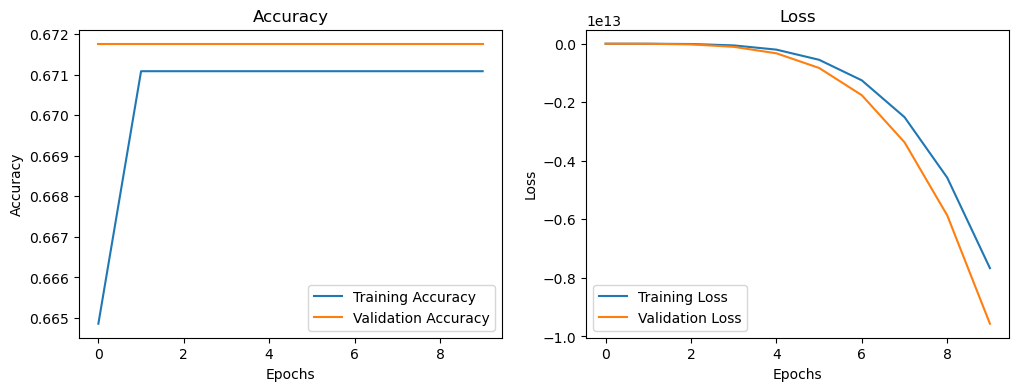

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Prediction for test image: Bad Image


In [12]:
import zipfile
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Step 1: Specify the path of the zipped dataset
zip_file_path = '/Users/rahul.g/Desktop/drive-download-20241201T152444Z-001.zip'  # Dataset path
extract_dir = './dataset'

# Step 2: Extract the zipped dataset
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Verify the dataset structure
print("Extracted files:")
print(os.listdir(extract_dir))

# Ensure directories exist
GOOD_IMAGES_DIR = os.path.join(extract_dir, 'good')
BAD_IMAGES_DIR = os.path.join(extract_dir, 'bad')

if not os.path.exists(GOOD_IMAGES_DIR) or not os.path.exists(BAD_IMAGES_DIR):
    raise FileNotFoundError("Ensure the dataset contains 'good' and 'bad' directories.")
else:
    print("Dataset structure verified. Proceeding to training.")

# Hyperparameters
IMG_SIZE = (128, 128)  # Resize images to 128x128
BATCH_SIZE = 32
EPOCHS = 10

# Data Preparation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 20% of data for validation
)

train_generator = train_datagen.flow_from_directory(
    extract_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training',
    shuffle=True
)

validation_generator = train_datagen.flow_from_directory(
    extract_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation',
    shuffle=True
)

# Visualize some sample images
def plot_samples(generator, title):
    images, labels = next(generator)
    plt.figure(figsize=(10, 10))
    for i in range(9):  # Display 9 images
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(f"Label: {'Bad' if labels[i] == 1 else 'Good'}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

plot_samples(train_generator, "Training Data Samples")

# Model Definition
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Model Training
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=EPOCHS,
    callbacks=[early_stopping]
)

# Visualize Training and Validation Accuracy/Loss
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_training_history(history)

# Save Model
model.save('./scratch_detection_model.h5')

# Testing on a Single Image
def predict_image(img_path):
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    prediction = model.predict(img_array)
    return "Bad Image" if prediction[0] > 0.5 else "Good Image"

# Test Example
test_image_path = os.path.join(BAD_IMAGES_DIR, os.listdir(BAD_IMAGES_DIR)[0])  # Replace with actual test image path if needed
result = predict_image(test_image_path)
print(f"Prediction for test image: {result}")
